How they work on a competition is like below.

1.EDA

2.Build a simple model

3.Try various features on a simple model

4.Build a complex model

5.Train with promising features

# 1.Correlation
This is the simplest way to see the relation between features. In here, if the value on the target is close to 0, it means that the feature may be irrelevant to the target.

In [1]:
import gc    #Garbage Collection:管理記憶體
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
random.seed(42)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# isna & isin : https://srdatw.blogspot.com/2019/01/python-pandas.html
def reload():
    gc.collect()
    df = pd.read_csv("data/train_V2.csv")
    invalid_match_ids = df[df['winPlacePerc'].isna()]['matchId'].values    #values會把"matchId"的值以array包起來
    df = df[-df['matchId'].isin(invalid_match_ids)]
    return df

In [21]:
df = reload()

cols_to_drop = ['Id','groupId','matchId','matchType']
cols_to_fit = [col for col in df.columns if col not in cols_to_drop]

In [23]:
corr = df[cols_to_fit].corr()
corr

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.307683,0.406726,0.301057,0.198289,0.228556,-0.290062,0.039066,0.319690,0.243471,...,0.198320,0.110644,0.011903,0.023372,0.006081,0.057921,0.290305,0.243882,0.024014,0.299441
boosts,0.307683,1.000000,0.521947,0.358907,0.334661,0.535854,-0.554844,0.008347,0.502024,0.405327,...,0.253125,0.328855,0.035124,0.107993,0.013068,0.087387,0.640150,0.406609,-0.007645,0.634234
damageDealt,0.406726,0.521947,1.000000,0.735763,0.613409,0.342987,-0.677398,0.049904,0.888783,0.703599,...,0.256951,0.140883,0.052487,0.036729,0.015468,0.081182,0.398199,0.353248,0.017762,0.440507
DBNOs,0.301057,0.358907,0.735763,1.000000,0.469923,0.265485,-0.555290,0.042616,0.707848,0.646872,...,0.300999,0.102537,0.036093,0.017320,0.069430,0.060210,0.284660,0.218161,0.011108,0.279970
headshotKills,0.198289,0.334661,0.613409,0.469923,1.000000,0.199917,-0.469829,0.023988,0.674275,0.512882,...,0.150145,0.076495,0.013369,0.028531,0.008658,0.039200,0.250982,0.217552,0.004982,0.277722
heals,0.228556,0.535854,0.342987,0.265485,0.199917,1.000000,-0.386032,-0.002585,0.311781,0.270412,...,0.236680,0.297484,0.024619,0.079587,0.035386,0.062870,0.430266,0.309071,-0.010990,0.427857
killPlace,-0.290062,-0.554844,-0.677398,-0.555290,-0.469829,-0.386032,1.000000,-0.023278,-0.730499,-0.810517,...,-0.269804,-0.236202,-0.057356,-0.089396,-0.037797,-0.073569,-0.590236,-0.490144,-0.002415,-0.719069
killPoints,0.039066,0.008347,0.049904,0.042616,0.023988,-0.002585,-0.023278,1.000000,0.036192,0.037091,...,0.012041,-0.029316,-0.004156,-0.004604,-0.039739,-0.009658,0.004630,-0.003978,0.983417,0.012908
kills,0.319690,0.502024,0.888783,0.707848,0.674275,0.311781,-0.730499,0.036192,1.000000,0.802500,...,0.253323,0.114750,0.063651,0.039127,0.017601,0.079991,0.374774,0.336414,0.006929,0.419916
killStreaks,0.243471,0.405327,0.703599,0.646872,0.512882,0.270412,-0.810517,0.037091,0.802500,1.000000,...,0.241695,0.098420,0.065575,0.034588,0.027612,0.064374,0.327639,0.275373,0.008552,0.377566


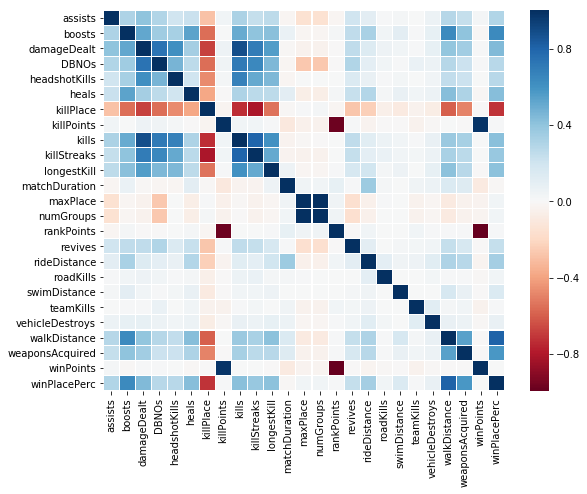

In [24]:
plt.figure(figsize = (9,7))
sns.heatmap(corr,xticklabels = corr.columns.values, yticklabels = corr.columns.values, linecolor = 'white', linewidth = 0.1, cmap='RdBu')
plt.show()

In [28]:
agg = df.groupby(['groupId']).size().to_frame('players_in_team')    #size:顯示所有數據的個數 vs len:返回長度    https://blog.csdn.net/songyunli1111/article/details/78079904
agg.head()    #to_frame:把資料轉成dataFrame型態

,players_in_team
groupId,
00000c08b5be36,3
00000d1cbbc340,1
000025a09dd1d7,1
000038ec4dff53,3
00003a54230763,2


In [30]:
df = df.merge(agg , how='left',on =['groupId'])    #merge:http://violin-tao.blogspot.com/2017/06/pandas-2-concat-merge.html
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players_in_team
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,4
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,4
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,2
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,1
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,1


In [32]:
df['headshotKills_over_kills'] = df['headshotKills'] / df['kills']
df['headshotKills_over_kills'].fillna(0, inplace=True)
df['killPlace_over_maxPlace'] = df['killPlace'] / df['maxPlace']
df['killPlace_over_maxPlace'].fillna(0, inplace=True)
df['killPlace_over_maxPlace'].replace(np.inf, 0, inplace=True)
corr = df[['killPlace', 'walkDistance', 'players_in_team', 'headshotKills_over_kills', 'killPlace_over_maxPlace', 'winPlacePerc']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True,
    linecolor='white',
    linewidths=0.1,
    cmap="RdBu"
)
plt.show()

MemoryError: 